# Predicting an exoplanet's distance from its host star

### Group Name: SPACE!
Ben Rycroft (s3947135)

Rita Lam Cordeiro (s3471881)

## Table of Contents

- Introduction
    - Dataset Source
    - Dataset Details
    - Dataset Features
    - Dataset Variables
- Goals and Objectives
- Data Cleaning and Preprocessing
- Summary and Conclusion
- References

## Introduction

#### Dataset Source

**website:** https://exoplanetarchive.ipac.caltech.edu  

The NASA Exoplanet archive compiles data on all known exoplanets and their host stars including exoplanet parameters, stellar parameters and, discovery/characterization data. 

This archive includes three data sets: "List of All known planets and hosts", "List of all Kepler Objects of Interest (KOIs)", and "List of all Kepler Threshold-Crossing Events (TCEs). We have chosen to solely use "List of All known planets and hosts" for this project.


### Dataset Details

Due to large amount of NaN values we have decided to split the data into subsets which focus on corellating different sets of values with a planet's distance from its host star, this is our response variable. There are 11 subsets in our dataset, they include the value of the observed attribute and the upper and lower

### Dataset Variables

following is a summary of each subset and its collumns, unit names are in brackets.

**rad (Radius):**  
Data Type: numeric   
[Earth Radius]: Earth Radius is a measure of planetary radius that describes how many earth radii  an exoplanet's radius is equal to  

pl_rade:        Planet Radius  
pl_radeerr1:    Planet Radius Upper Uncertainty   
pl_radeerr2:    Planet Radius Lower Uncertainty  
pl_radelim:     Planet Radius Limit Flag  

**mass:**  
Data Type: numeric  
[Earth Mass]  Earth Mass is a measure of planetary Mass that describes how many earth masses an exoplanet's radius is equal to

pl_masse:       Planet Mass  
pl_masseerr1:   Planet Mass Upper Uncertainty  
pl_masseerr2:   Planet Mass Lower Uncertainty  
pl_masselim:    Planet Mass Limit Flag  

**dens (Density):**  
Data Type: numeric  
[g/cm^3]: grammes per centimeter cubed.  

pl_dens:        Planet Density  
pl_denserr1:    Planet Density Upper Uncertainty
pl_denserr2:    Planet Density Lower Uncertainty
pl_denslim:     Planet Density Limit Flag  

**orbeccen (Orbit Eccentricity):**    
Data Type: numeric  
[eccentricity]: the measure deviation of an orbit from circularity, the closer to 1, the more circular.  

pl_orbeccen:    Eccentricity  
pl_orbeccenerr1: Eccentricity Upper Uncertainty  
pl_orbeccenerr2: Eccentricity Lower Uncertainty  
pl_orbeccenlim: Eccentricity Limit Flag  

**insol (Insolation):**  
Data Type: numeric  
[Earth Flux]: Flux measures how much light energy is being radiated in a given area. 

pl_insol:       Insolation Flux   
pl_insolerr1:   Insolation Flux Upper Uncertainty   
pl_insolerr2:   Insolation Flux Lower Uncertainty   
pl_insollim:    Insolation Flux Limit Flag  

**eqt (Equilibrium Temperature):**  
Data Type: numeric  
[K]: Kelvin, a measure of temperature. 

pl_eqt:         Equilibrium Temperature  
pl_eqterr1:     Equilibrium Temperature Upper Uncertainty  
pl_eqterr2:     Equilibrium Temperature Lower Uncertainty  
pl_eqtlim:      Equilibrium Temperature Limit Flag  

**teff (Stellar Effective Temperature):**   
Data Type: numeric  
[K]: Kelvin, a measure of temperature.

st_teff:        Stellar Effective Temperature   
st_tefferr1:    Stellar Effective Temperature Upper Unc.   
st_tefferr2:    Stellar Effective Temperature Lower Unc.   
st_tefflim:     Stellar Effective Temperature Limit Flag  

**radst (Radius of Star):**      
Data Type: numeric   
[Solar Radius]:  Solar Radius is a measure of stellar radius that describes how many Solar radii a Star's radius is equal to.  

st_rad:         Stellar Radius    
st_raderr1:     Stellar Radius Upper Uncertainty   
st_raderr2:     Stellar Radius Lower Uncertainty   
st_radlim:      Stellar Radius Limit Flag  

**massst (Mass of Star):**     
Data Type: numeric  
[Solar mass]: Solar Mass is a measure of stellar mass that describes how many solar masses a Star's radius is equal to.    

st_mass:        Stellar Mass   
st_masserr1:    Stellar Mass Upper Uncertainty   
st_masserr2:    Stellar Mass Lower Uncertainty   
st_masslim:     Stellar Mass Limit Flag  

**met (Metallicity):**   
Data Type: numeric  
[dex]: decimal exponent, measures the abundance of metal in a star.

st_met:         Stellar Metallicity   
st_meterr1:     Stellar Metallicity Upper Uncertainty   
st_meterr2:     Stellar Metallicity Lower Uncertainty  
st_metlim:      Stellar Metallicity Limit Flag  

**agest (Stellar Age):**  
Data Type: numeric  
[Gyr]: Giga year (one billion years), the age of the star.

st_age:         Stellar Age   
st_ageerr1:     Stellar Age Upper Uncertainty   
st_ageerr2:     Stellar Age Lower Uncertainty  
st_agelim:      Stellar Age Limit Flag  

### Goals and Objectives 
There is a lot we can tell about a planet based on the distance from its star, we aim to further our insight into how solar systems are formed and look for patterns and clues in order to attempt get a better picture of the history of our universe. 

The main objective of this project is to be able to predict an exoplanet's distance from its host star as well as to identify what values are best suited for making this prediction.



In [21]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
from scipy.stats import linregress


pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")
###

In [22]:
#naming the dataset
df = pd.read_csv("https://raw.githubusercontent.com/BenRyc/SPACE-/main/orbitDistNoLim.csv")

## Data Cleaning and Preprocessing
Preparing the data for modelling

### Step 1
The https://exoplanetarchive.ipac.caltech.edu site where the data was colected from required us to specify what columns of the larger dataset that we needed to download. We only selected the relevent columns that we wanted to investegate and we also excluded datapoints like names of planets and stars. 

### Step 2 
Here are the columns of the dataset

In [23]:
df.columns

Index(['sy_snum', 'sy_pnum', 'discoverymethod', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2',
       'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_masse', 'pl_masseerr1',
       'pl_masseerr2', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
       'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_rad',
       'st_raderr1', 'st_raderr2', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_logg',
       'st_loggerr1', 'st_loggerr2', 'st_age', 'st_ageerr1', 'st_ageerr2',
       'st_agelim', 'st_dens', 'st_denserr1', 'st_denserr2', 'sy_dist',
       'sy_disterr1', 'sy_disterr2'],
      dtype='object')

There are many different variables that we intend to compare to orbit and not every row has values for every column this is why we decided to split the dataset into lots of smaller datasets each only compairing one variable against the orbit radius. This way we can remove all the rows with null values from each of the datasubsets without removing the rows from other datasubsets. 

In [24]:
rad = df.dropna(subset=['pl_rade', 'pl_radeerr1', 'pl_radeerr2'])
mass = df.dropna(subset=['pl_masse', 'pl_masseerr1', 'pl_masseerr2'])
dens = df.dropna(subset=['pl_dens', 'pl_denserr1', 'pl_denserr2'])
orbeccen = df.dropna(subset=['pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2'])
insol = df.dropna(subset=['pl_insol', 'pl_insolerr1', 'pl_insolerr2'])
eqt = df.dropna(subset=['pl_eqt', 'pl_eqterr1', 'pl_eqterr2'])
teff = df.dropna(subset=['st_teff', 'st_tefferr1', 'st_tefferr2'])
radst = df.dropna(subset=['st_rad', 'st_raderr1', 'st_raderr2'])
massst = df.dropna(subset=['st_mass', 'st_masserr1', 'st_masserr2'])
met = df.dropna(subset=['st_met', 'st_meterr1', 'st_meterr2'])
agest = df.dropna(subset=['st_age', 'st_ageerr1', 'st_ageerr2'])

# 3 verables 

massDens = df.dropna(subset=['pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_dens', 'pl_denserr1', 'pl_denserr2'])
insolEqt = df.dropna(subset=['pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2'])
massstMet = df.dropna(subset=['st_mass', 'st_masserr1', 'st_masserr2', 'st_met', 'st_meterr1', 'st_meterr2'])

### Step 3 
Next was to only include the relevant columns in each data subset

In [25]:
rad = rad[['pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
mass = mass[['pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
dens = dens[['pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
orbeccen = orbeccen[['pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
insol = insol[['pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
eqt = eqt[['pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
teff = teff[['st_teff', 'st_tefferr1', 'st_tefferr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
radst = radst[['st_rad', 'st_raderr1', 'st_raderr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
massst = massst[['st_mass', 'st_masserr1', 'st_masserr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
met = met[['st_met', 'st_meterr1', 'st_meterr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
agest = agest[['st_age', 'st_ageerr1', 'st_ageerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]

# 3 verable 
massDens = massDens[['pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
insolEqt = insolEqt[['pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
massstMet = massstMet[['st_mass', 'st_masserr1', 'st_masserr2', 'st_met', 'st_meterr1', 'st_meterr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]


## Step 4 
No we remove the outlighers from the data

In [26]:

rad = rad[~((rad < (rad.quantile(0.25) - 1.5 * (rad.quantile(0.75) - rad.quantile(0.25)))) |(rad > (rad.quantile(0.75) + 1.5 * (rad.quantile(0.75) - rad.quantile(0.25))))).any(axis=1)]
mass = mass[~((mass < (mass.quantile(0.25) - 1.5 * (mass.quantile(0.75) - mass.quantile(0.25)))) |(mass > (mass.quantile(0.75) + 1.5 * (mass.quantile(0.75) - mass.quantile(0.25))))).any(axis=1)]
dens = dens[~((dens < (dens.quantile(0.25) - 1.5 * (dens.quantile(0.75) - dens.quantile(0.25)))) |(dens > (dens.quantile(0.75) + 1.5 * (dens.quantile(0.75) - dens.quantile(0.25))))).any(axis=1)]
orbeccen = orbeccen[~((orbeccen < (orbeccen.quantile(0.25) - 1.5 * (orbeccen.quantile(0.75) - orbeccen.quantile(0.25)))) |(orbeccen > (orbeccen.quantile(0.75) + 1.5 * (orbeccen.quantile(0.75) - orbeccen.quantile(0.25))))).any(axis=1)]
insol = insol[~((insol < (insol.quantile(0.25) - 1.5 * (insol.quantile(0.75) - insol.quantile(0.25)))) |(insol > (insol.quantile(0.75) + 1.5 * (insol.quantile(0.75) - insol.quantile(0.25))))).any(axis=1)]
eqt = eqt[~((eqt < (eqt.quantile(0.25) - 1.5 * (eqt.quantile(0.75) - eqt.quantile(0.25)))) |(eqt > (eqt.quantile(0.75) + 1.5 * (eqt.quantile(0.75) - eqt.quantile(0.25))))).any(axis=1)]
teff = teff[~((teff < (teff.quantile(0.25) - 1.5 * (teff.quantile(0.75) - teff.quantile(0.25)))) |(teff > (teff.quantile(0.75) + 1.5 * (teff.quantile(0.75) - teff.quantile(0.25))))).any(axis=1)]
radst = radst[~((radst < (radst.quantile(0.25) - 1.5 * (radst.quantile(0.75) - radst.quantile(0.25)))) |(radst > (radst.quantile(0.75) + 1.5 * (radst.quantile(0.75) - radst.quantile(0.25))))).any(axis=1)]
massst = massst[~((massst < (massst.quantile(0.25) - 1.5 * (massst.quantile(0.75) - massst.quantile(0.25)))) |(massst > (massst.quantile(0.75) + 1.5 * (massst.quantile(0.75) - massst.quantile(0.25))))).any(axis=1)]
met = met[~((met < (met.quantile(0.25) - 1.5 * (met.quantile(0.75) - met.quantile(0.25)))) |(met > (met.quantile(0.75) + 1.5 * (met.quantile(0.75) - met.quantile(0.25))))).any(axis=1)]
agest = agest[~((agest < (agest.quantile(0.25) - 1.5 * (agest.quantile(0.75) - agest.quantile(0.25)))) |(agest > (agest.quantile(0.75) + 1.5 * (agest.quantile(0.75) - agest.quantile(0.25))))).any(axis=1)]

# 3 verables
massDens = massDens[~((massDens < (massDens.quantile(0.25) - 1.5 * (massDens.quantile(0.75) - massDens.quantile(0.25)))) |(massDens > (massDens.quantile(0.75) + 1.5 * (massDens.quantile(0.75) - massDens.quantile(0.25))))).any(axis=1)]
insolEqt = insolEqt[~((insolEqt < (insolEqt.quantile(0.25) - 1.5 * (insolEqt.quantile(0.75) - insolEqt.quantile(0.25)))) |(insolEqt > (insolEqt.quantile(0.75) + 1.5 * (insolEqt.quantile(0.75) - insolEqt.quantile(0.25))))).any(axis=1)]
massstMet = massstMet[~((massstMet < (massstMet.quantile(0.25) - 1.5 * (massstMet.quantile(0.75) - massstMet.quantile(0.25)))) |(massstMet > (massstMet.quantile(0.75) + 1.5 * (massstMet.quantile(0.75) - massstMet.quantile(0.25))))).any(axis=1)]


## Data Visualisation 

In [40]:
# slope, intercept, r_value, p_value, std_err = linregress(rad['pl_orbsmax'], rad['pl_rade'])
# rad.plot(kind = 'scatter', 
#          x = 'pl_orbsmax', 
#          y = 'pl_rade', 

#          xerr=rad['pl_orbsmaxerr1'], 
#          yerr=rad['pl_radeerr1'],
#          ylabel= 'Radius of The Planet',
#          xlabel= 'Planet Orbital Radius',
#          title='Planet Orbital Radius vs Radius of The Planet')

# plt.plot(rad['pl_orbsmax'], intercept + slope*rad['pl_orbsmax'], 'r', label='fitted line')
# plt.legend(['Data', f'Trend Line R^2:{str(r_value**2)[0:5]}'])
# plt.show()

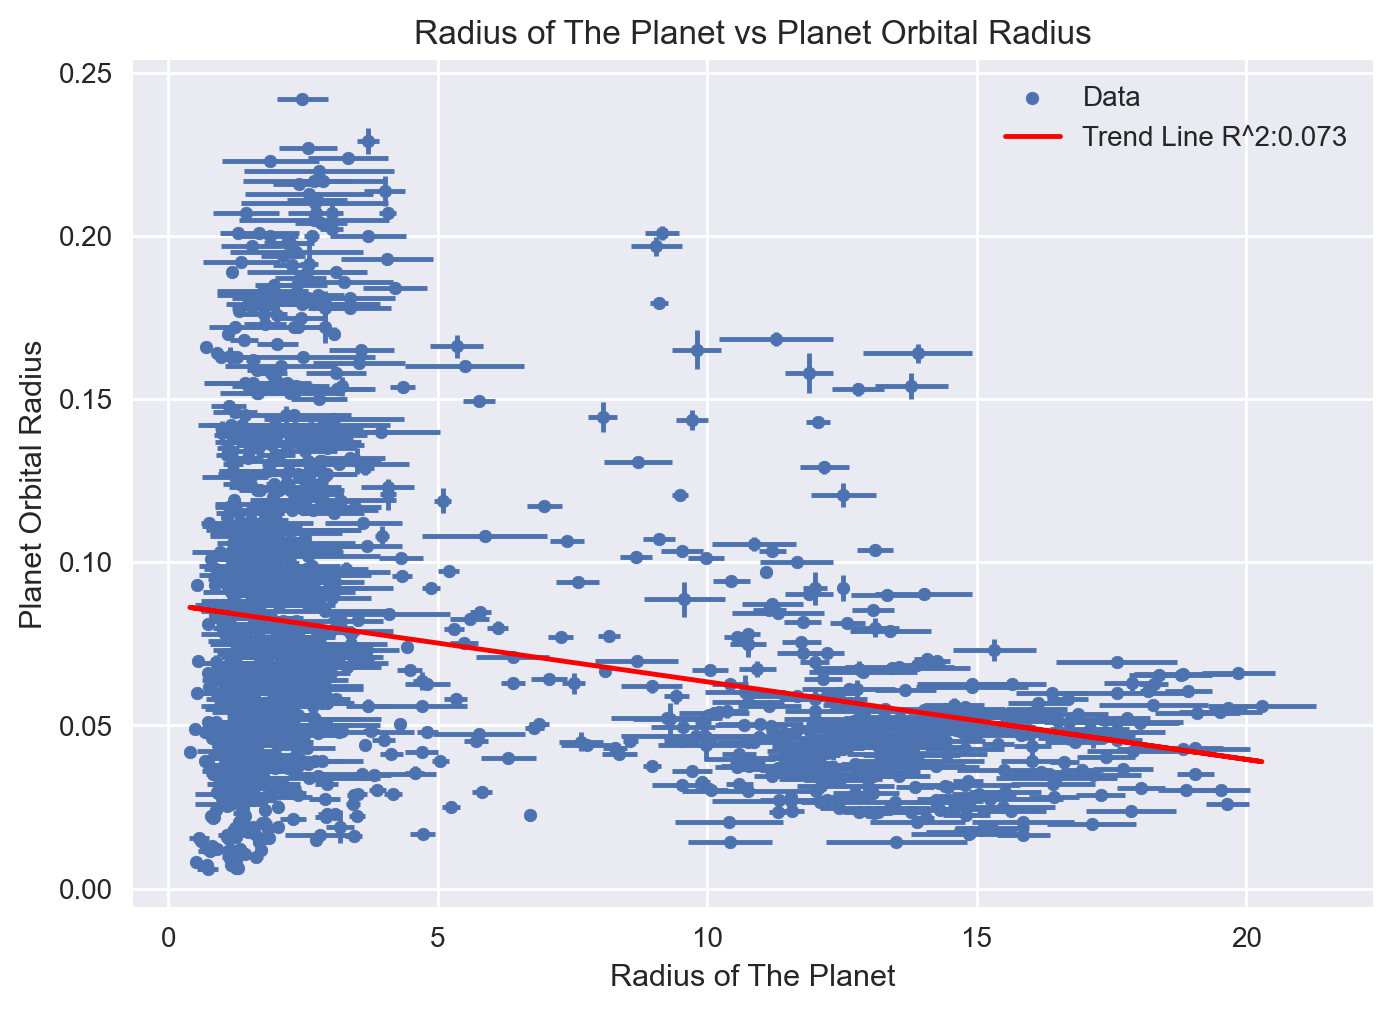

In [39]:
#THIS ONE HERE OFFICERR
slope, intercept, r_value, p_value, std_err = linregress(rad['pl_rade'], rad['pl_orbsmax'])
rad.plot(kind = 'scatter', 
         x = 'pl_rade', 
         y = 'pl_orbsmax', 

         xerr=rad['pl_radeerr1'], 
         yerr=rad['pl_orbsmaxerr1'],
         ylabel= 'Planet Orbital Radius',
         xlabel= 'Radius of The Planet',
         title='Radius of The Planet vs Planet Orbital Radius')

plt.plot(rad['pl_rade'], intercept + slope*rad['pl_rade'], 'r', label='fitted line')
plt.legend(['Data', f'Trend Line R^2:{str(r_value**2)[0:5]}'])
plt.show()

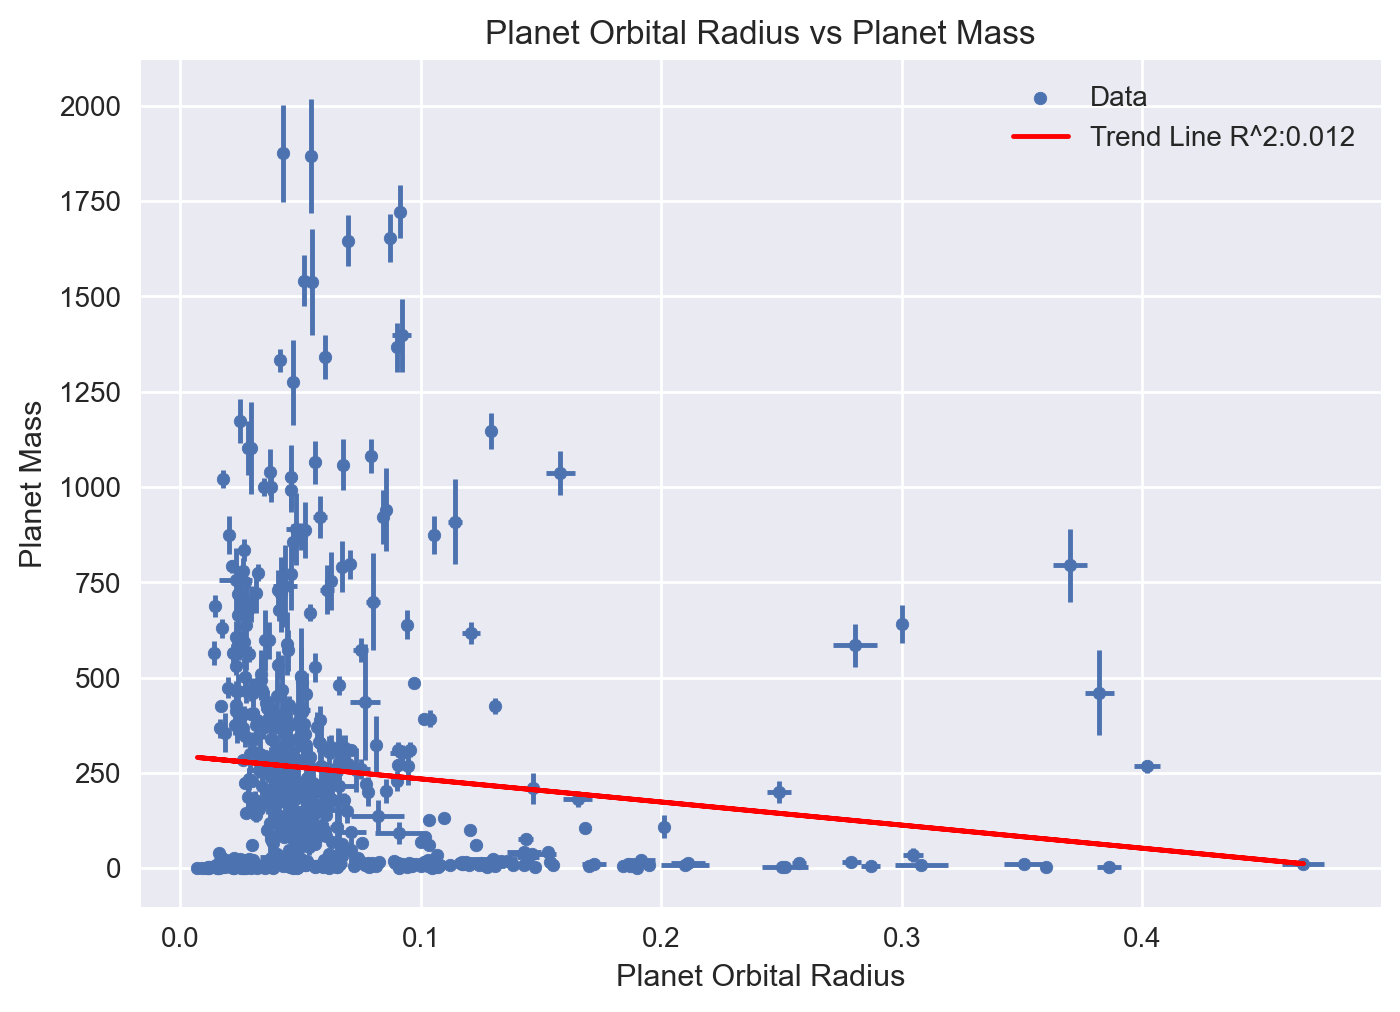

In [28]:
slope, intercept, r_value, p_value, std_err = linregress(mass['pl_orbsmax'], mass['pl_masse'])
mass.plot(kind = 'scatter', 
         x = 'pl_orbsmax', 
         y = 'pl_masse', 
         xerr=mass['pl_orbsmaxerr1'], 
         yerr=mass['pl_masseerr1'],
         ylabel= 'Planet Mass',
         xlabel= 'Planet Orbital Radius',
         title='Planet Orbital Radius vs Planet Mass')

plt.plot(mass['pl_orbsmax'], intercept + slope*mass['pl_orbsmax'], 'r', label='fitted line')
plt.legend(['Data', f'Trend Line R^2:{str(r_value**2)[0:5]}'])
plt.show()

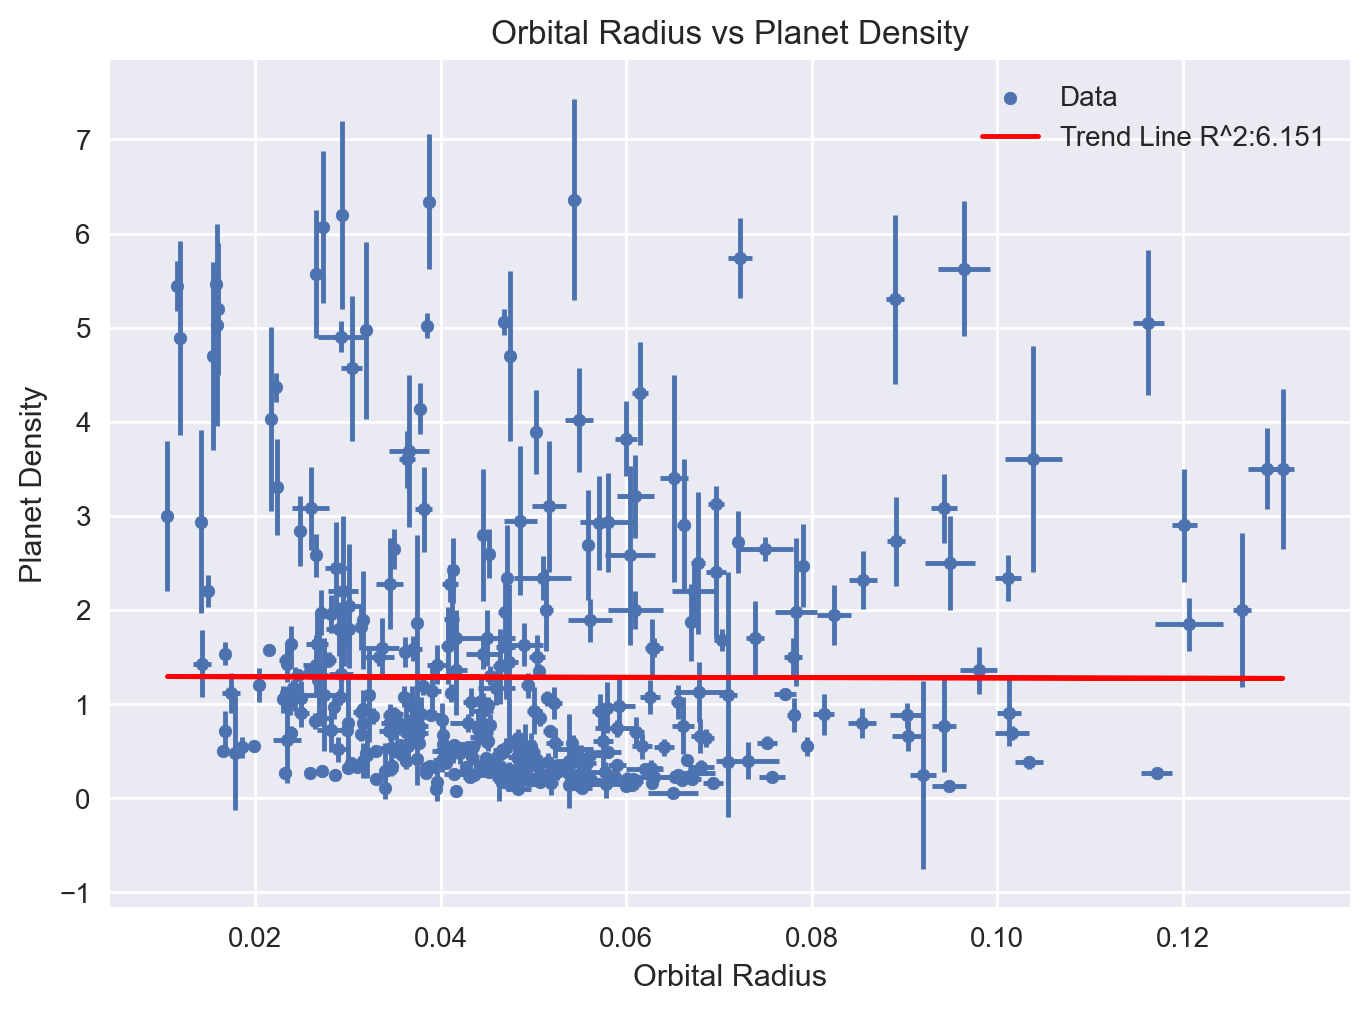

In [29]:
slope, intercept, r_value, p_value, std_err = linregress(dens['pl_orbsmax'], dens['pl_dens'])
dens.plot(kind = 'scatter', 
         x = 'pl_orbsmax', 
         y = 'pl_dens', 
         xerr=dens['pl_orbsmaxerr1'], 
         yerr=dens['pl_denserr1'],
         ylabel= 'Planet Density',
         xlabel= 'Orbital Radius',
         title='Orbital Radius vs Planet Density')

plt.plot(dens['pl_orbsmax'], intercept + slope*dens['pl_orbsmax'], 'r', label='fitted line')
plt.legend(['Data', f'Trend Line R^2:{str(r_value**2)[0:5]}'])
plt.show()

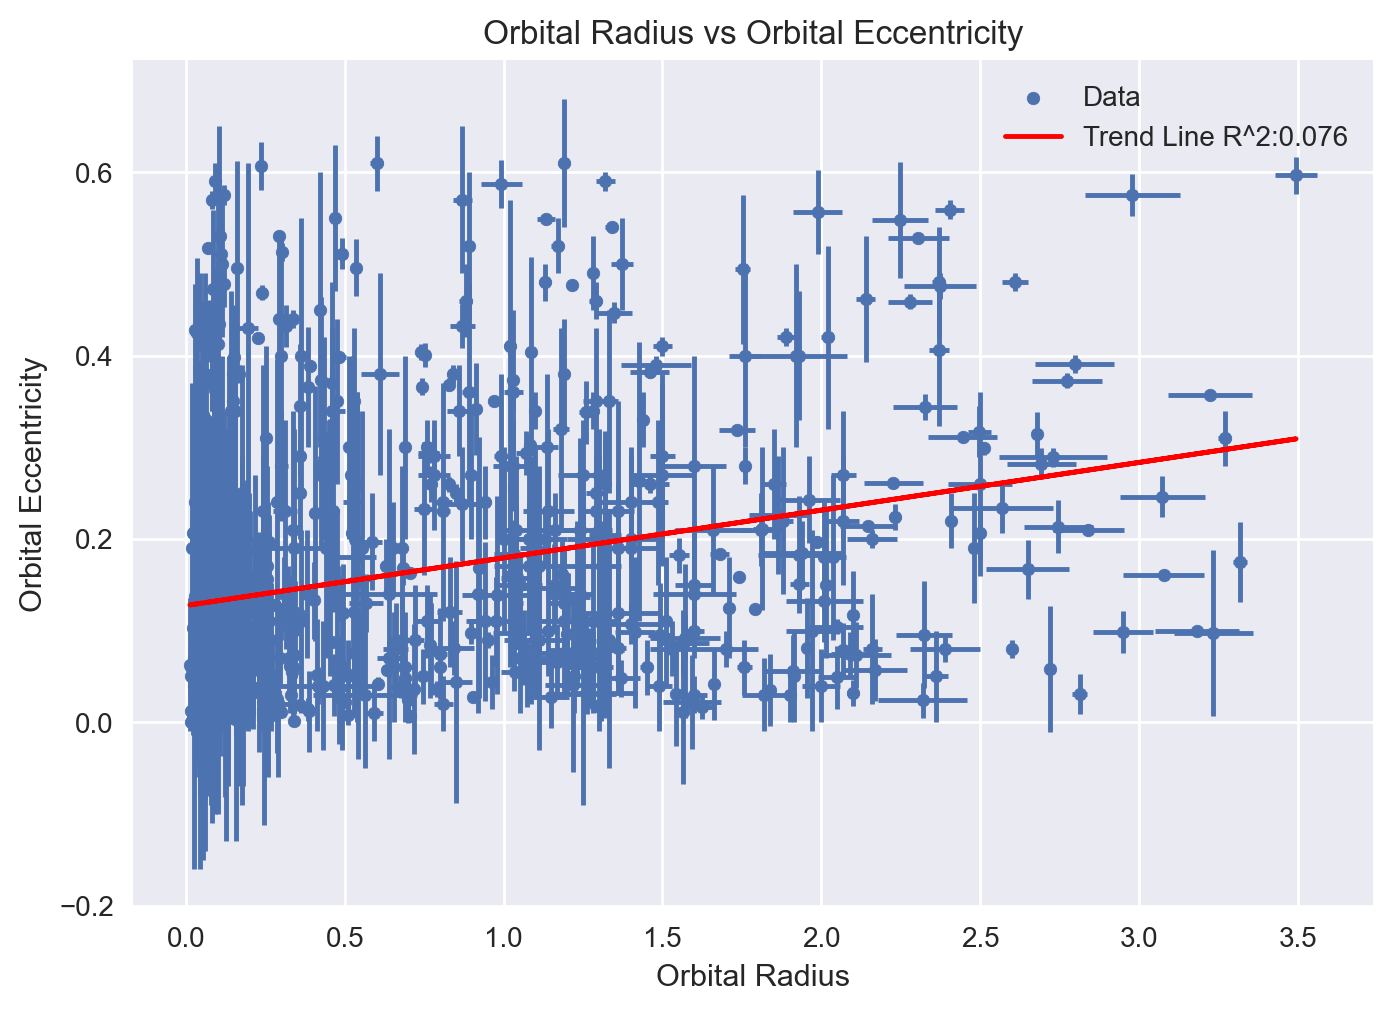

In [30]:
slope, intercept, r_value, p_value, std_err = linregress(orbeccen['pl_orbsmax'], orbeccen['pl_orbeccen'])
orbeccen.plot(kind = 'scatter', 
         x = 'pl_orbsmax', 
         y = 'pl_orbeccen', 
         xerr=orbeccen['pl_orbsmaxerr1'], 
         yerr=orbeccen['pl_orbeccenerr1'],
         ylabel= 'Orbital Eccentricity',
         xlabel= 'Orbital Radius',
         title='Orbital Radius vs Orbital Eccentricity')

plt.plot(orbeccen['pl_orbsmax'], intercept + slope*orbeccen['pl_orbsmax'], 'r', label='fitted line')
plt.legend(['Data', f'Trend Line R^2:{str(r_value**2)[0:5]}'])
plt.show()

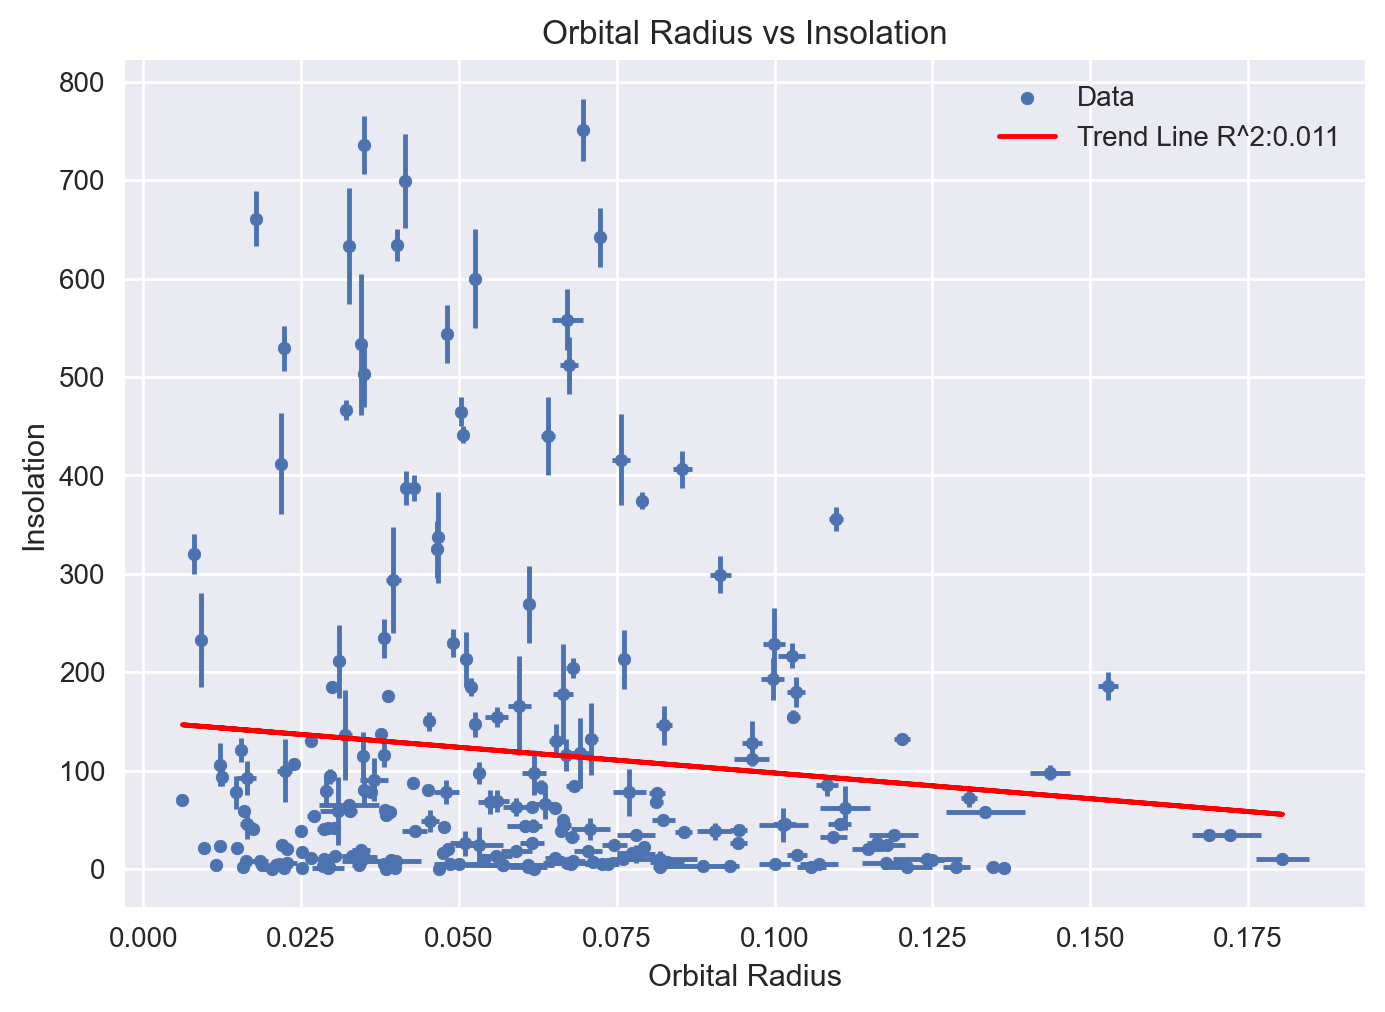

In [31]:
slope, intercept, r_value, p_value, std_err = linregress(insol['pl_orbsmax'], insol['pl_insol'])

insol.plot(kind = 'scatter', 
         x = 'pl_orbsmax', 
         y = 'pl_insol', 
         xerr=insol['pl_orbsmaxerr1'], 
         yerr=insol['pl_insolerr1'],
         ylabel= 'Insolation',
         xlabel= 'Orbital Radius',
         title='Orbital Radius vs Insolation')

plt.plot(insol['pl_orbsmax'], intercept + slope*insol['pl_orbsmax'], 'r', label='fitted line')
plt.legend(['Data', f'Trend Line R^2:{str(r_value**2)[0:5]}'])
plt.show()

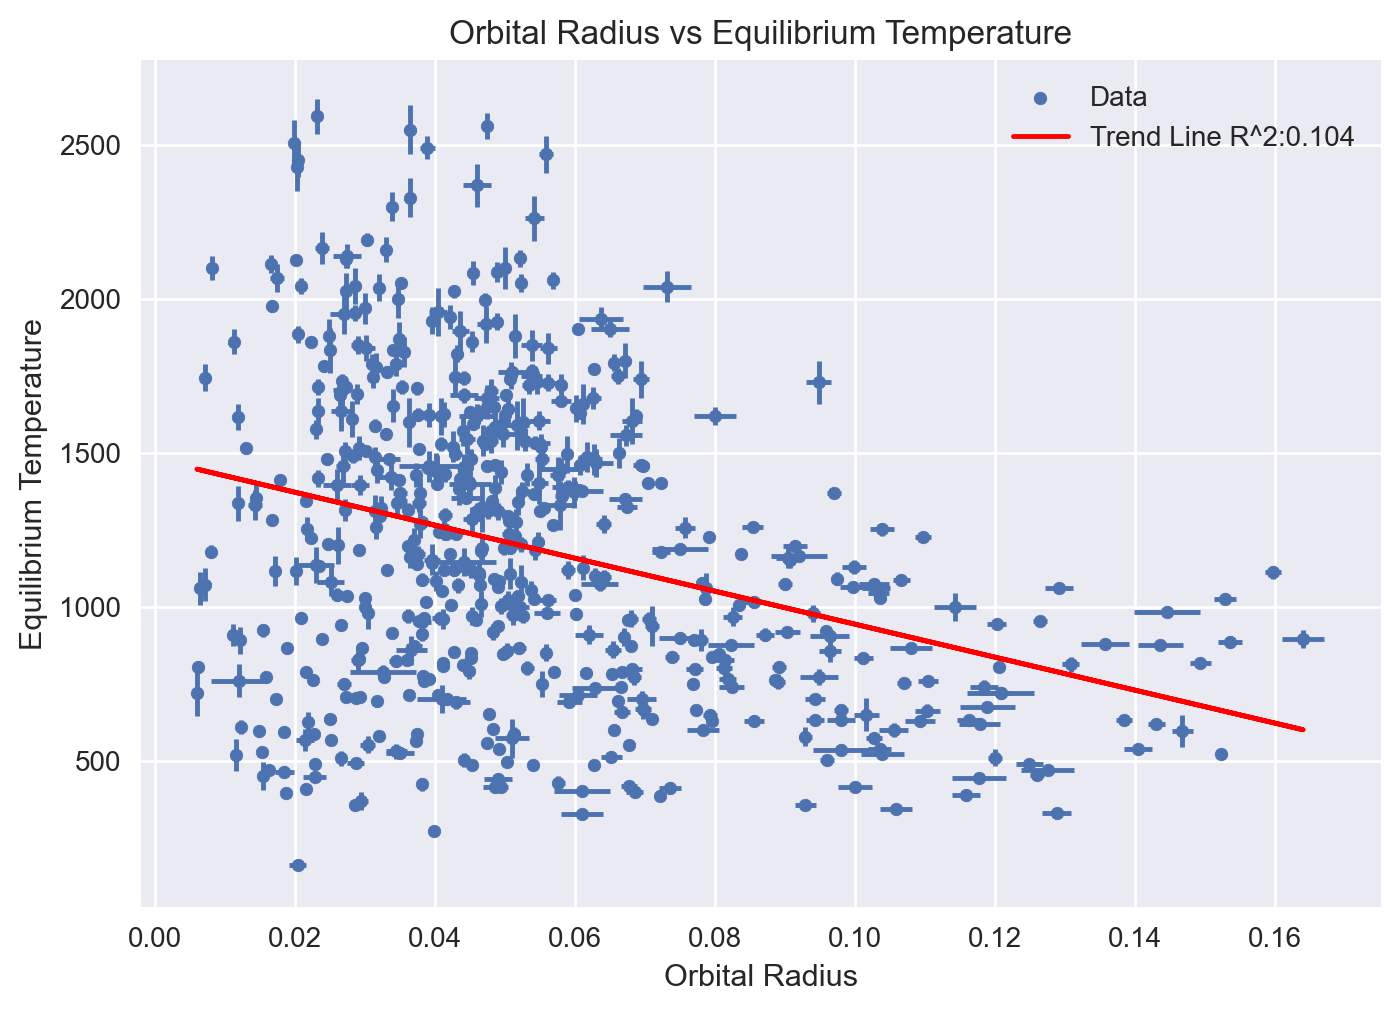

In [32]:
slope, intercept, r_value, p_value, std_err = linregress(eqt['pl_orbsmax'], eqt['pl_eqt'])
eqt.plot(kind = 'scatter', 
         x = 'pl_orbsmax', 
         y = 'pl_eqt', 
         xerr=eqt['pl_orbsmaxerr1'], 
         yerr=eqt['pl_eqterr1'],
         ylabel= 'Equilibrium Temperature',
         xlabel= 'Orbital Radius',
         title='Orbital Radius vs Equilibrium Temperature')

plt.plot(eqt['pl_orbsmax'], intercept + slope*eqt['pl_orbsmax'], 'r', label='fitted line')
plt.legend(['Data', f'Trend Line R^2:{str(r_value**2)[0:5]}'])
plt.show()

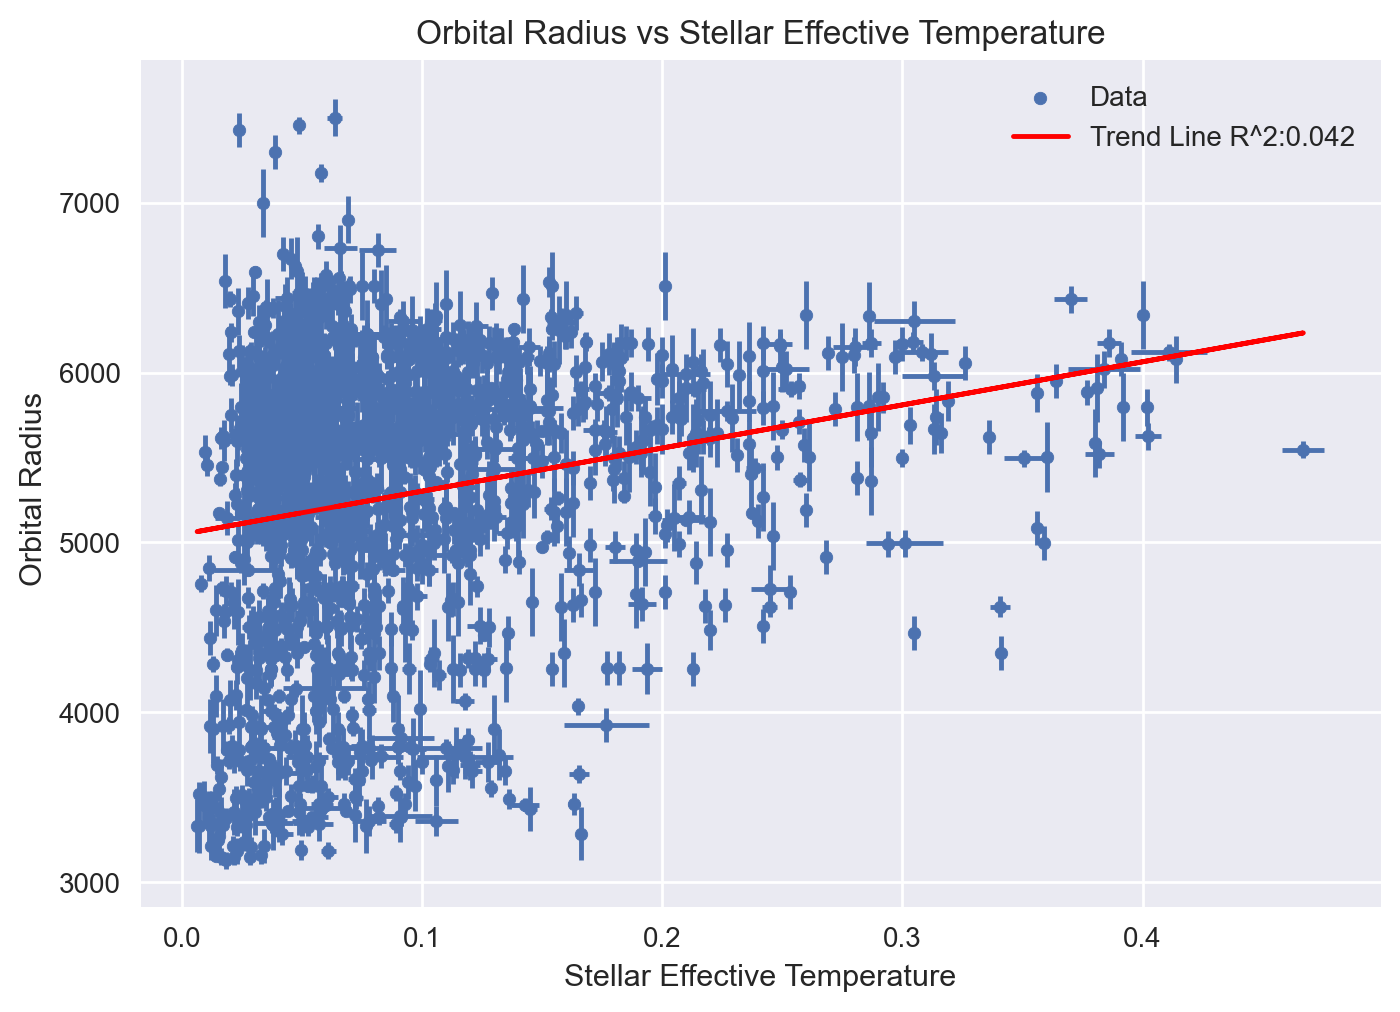

In [33]:
slope, intercept, r_value, p_value, std_err = linregress(teff['pl_orbsmax'], teff['st_teff'])
teff.plot(kind = 'scatter', 
         x = 'pl_orbsmax', 
         y = 'st_teff', 
         xerr=teff['pl_orbsmaxerr1'], 
         yerr=teff['st_tefferr1'],
         ylabel= 'Orbital Radius ',
         xlabel= 'Stellar Effective Temperature',
         title='Orbital Radius vs Stellar Effective Temperature')

plt.plot(teff['pl_orbsmax'], intercept + slope*teff['pl_orbsmax'], 'r', label='fitted line')
plt.legend(['Data', f'Trend Line R^2:{str(r_value**2)[0:5]}'])
plt.show()

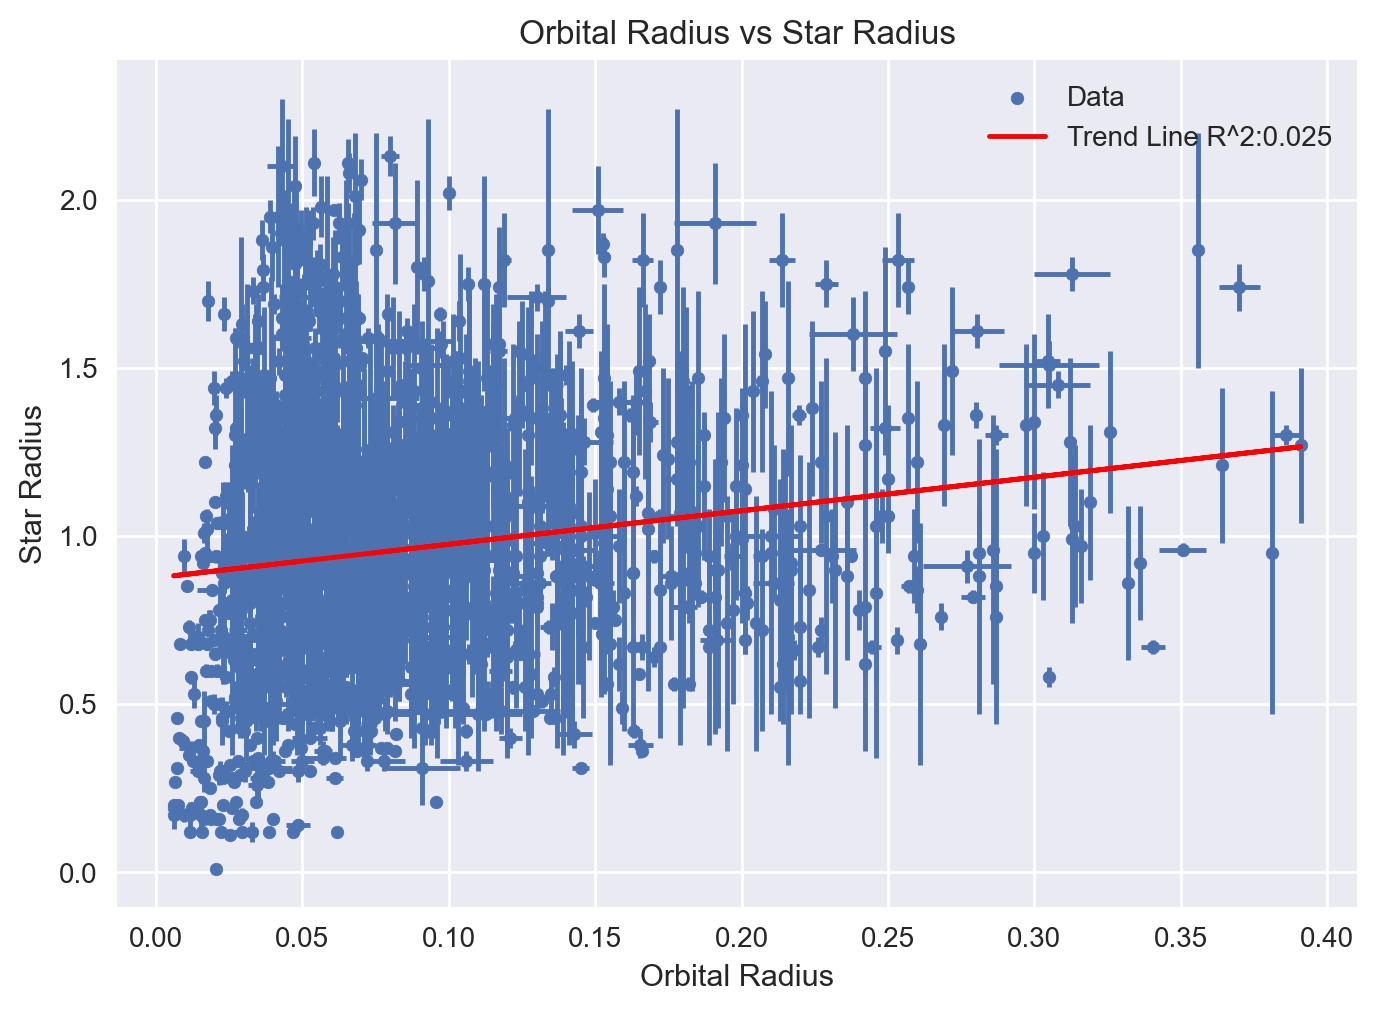

In [34]:
slope, intercept, r_value, p_value, std_err = linregress(radst['pl_orbsmax'], radst['st_rad'])
radst.plot(kind = 'scatter', 
         x = 'pl_orbsmax', 
         y = 'st_rad', 
         xerr=radst['pl_orbsmaxerr1'], 
         yerr=radst['st_raderr1'],
         ylabel= 'Star Radius',
         xlabel= 'Orbital Radius',
         title='Orbital Radius vs Star Radius')

plt.plot(radst['pl_orbsmax'], intercept + slope*radst['pl_orbsmax'], 'r', label='fitted line')
plt.legend(['Data', f'Trend Line R^2:{str(r_value**2)[0:5]}'])
plt.show()

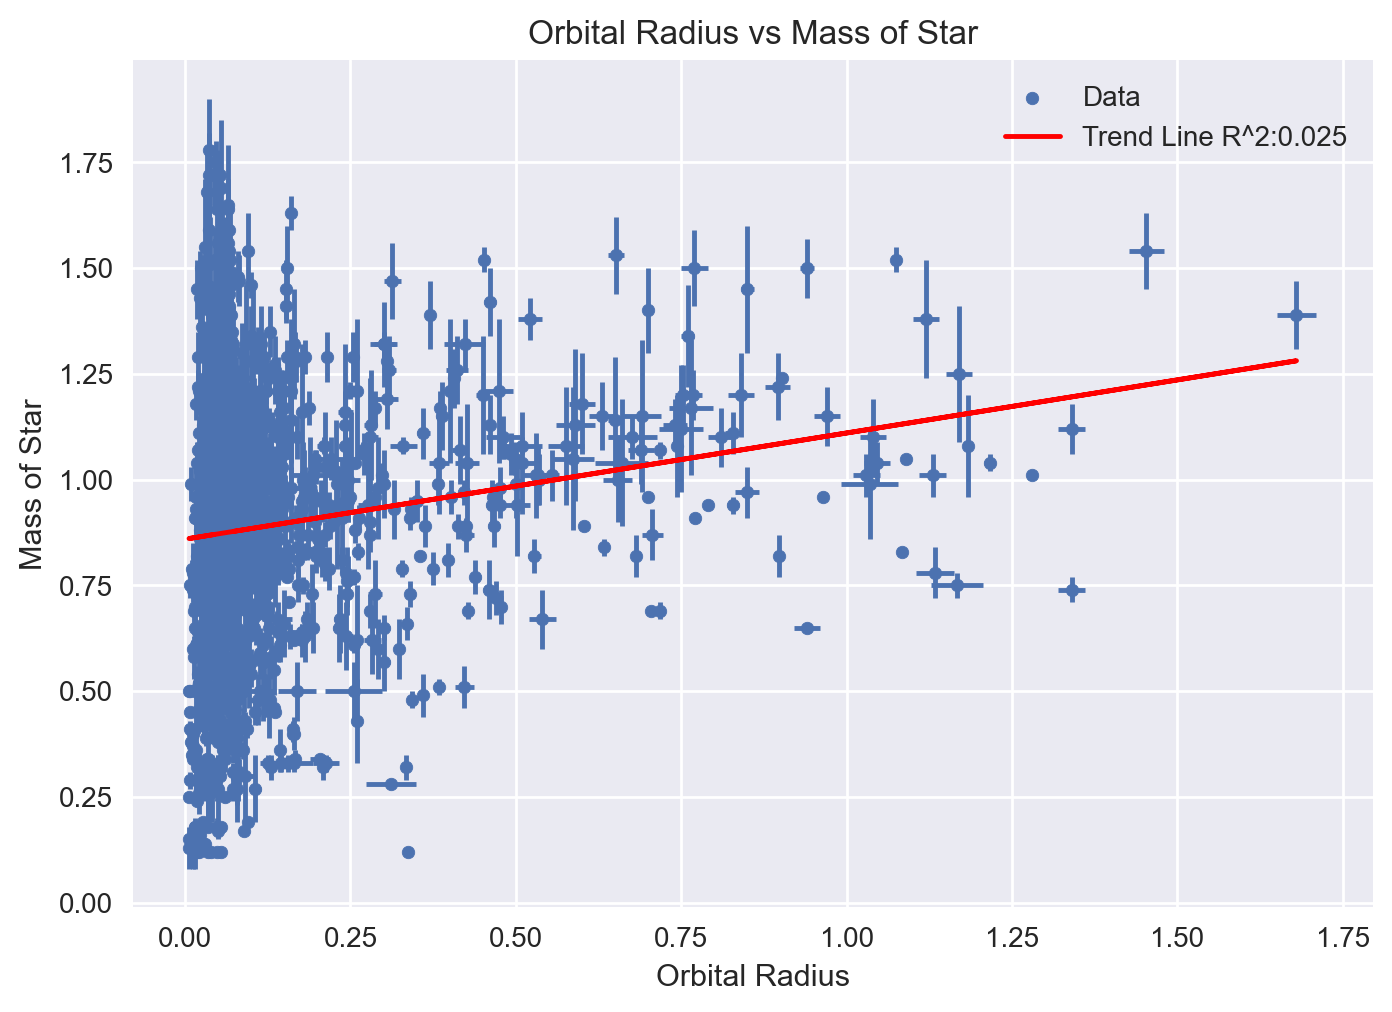

In [35]:
slope, intercept, r_value, p_value, std_err = linregress(massst['pl_orbsmax'], massst['st_mass'])
massst.plot(kind = 'scatter', 
         x = 'pl_orbsmax', 
         y = 'st_mass', 
         xerr=massst['pl_orbsmaxerr1'], 
         yerr=massst['st_masserr1'],
         ylabel= 'Mass of Star',
         xlabel= 'Orbital Radius',
         title='Orbital Radius vs Mass of Star')

plt.plot(massst['pl_orbsmax'], intercept + slope*massst['pl_orbsmax'], 'r', label='fitted line')
plt.legend(['Data', f'Trend Line R^2:{str(r_value**2)[0:5]}'])
plt.show()

In [36]:
slope, intercept, r_value, p_value, std_err = linregress(met['pl_orbper'], met['st_met'])
met.plot(kind = 'scatter', 
         x = 'pl_orbper', 
         y = 'st_met', 
         xerr=met['pl_orbpererr1'], 
         yerr=met['st_meterr1'],
         ylabel= 'Star Metallacity',
         xlabel= 'Orbital Radius',
         title='Orbital Radius vs Star Metallacity')

plt.plot(met['pl_orbper'], intercept + slope*met['pl_orbper'], 'r', label='fitted line')
plt.legend(['Data', f'Trend Line R^2:{str(r_value**2)[0:5]}'])
plt.show()
[1] Standard Errors assu

SyntaxError: invalid syntax (3628613269.py, line 14)

In [ ]:
slope, intercept, r_value, p_value, std_err = linregress(agest['pl_orbsmax'], agest['st_age'])
agest.plot(kind = 'scatter', 
         x = 'pl_orbsmax', 
         y = 'st_age', 
         xerr=agest['pl_orbsmaxerr1'], 
         yerr=agest['st_ageerr1'],
         ylabel= 'Age of Star',
         xlabel= 'Orbital Radius',
         title='Orbital Radius vs Age of Star')

plt.plot(agest['pl_orbsmax'], intercept + slope*agest['pl_orbsmax'], 'r', label='fitted line')
plt.legend(['Data', f'Trend Line R^2:{str(r_value**2)[0:5]}'])
plt.show()

In [ ]:
# massDens = massDens[['pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
plt.scatter( 
         x = massDens['pl_orbsmax'], 
         y = massDens['pl_masse'],
         s = massDens['pl_dens'],)
print( 'orbit radius Planet Mass with Planet density as size')
plt.show()

Solar Radiation vs orbit radius with Planet temprature as size


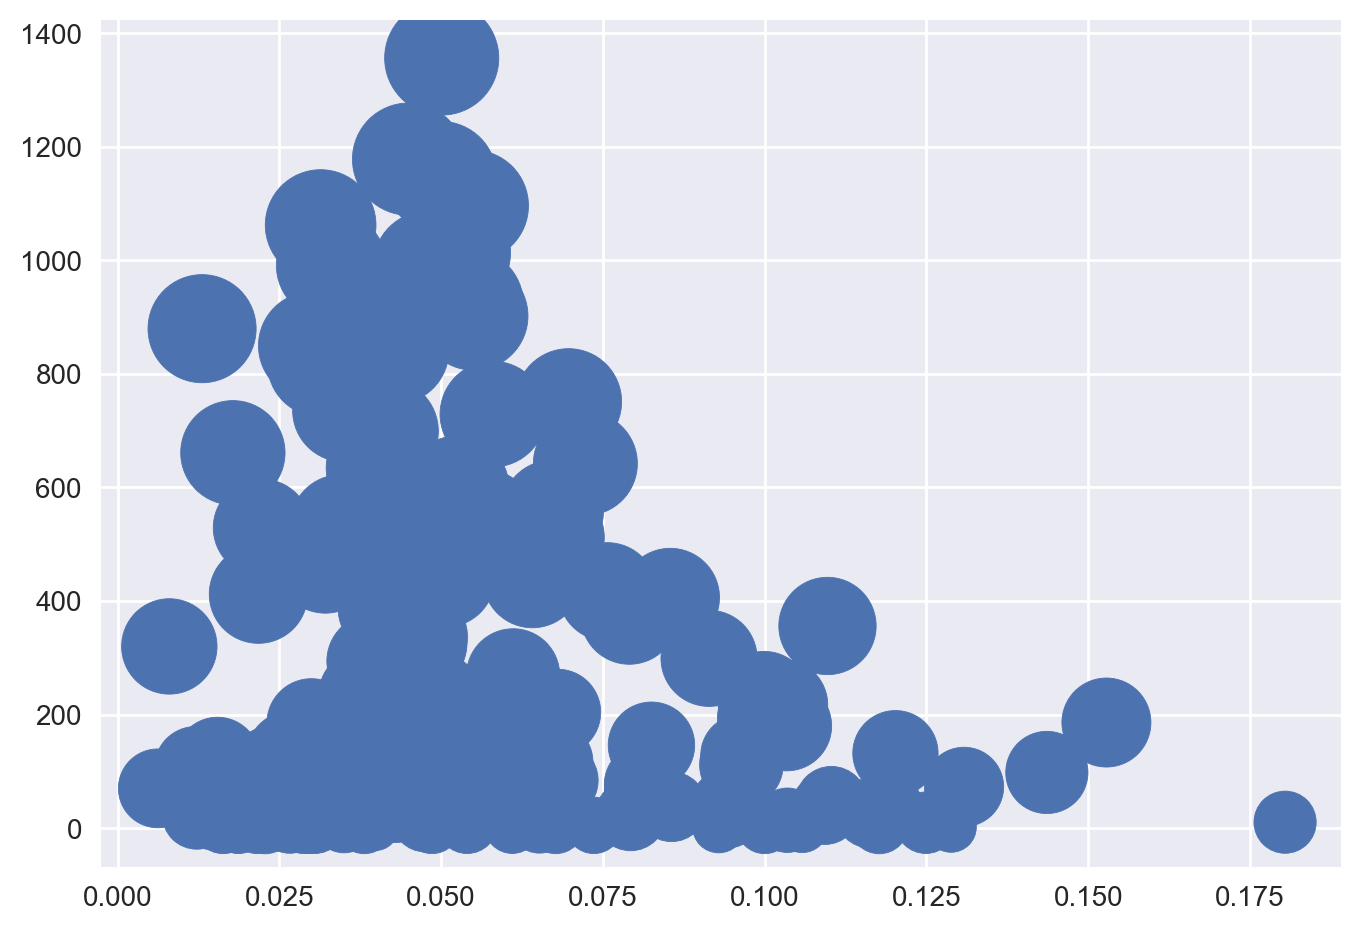

In [40]:
# insolEqt = insolEqt[['pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
plt.scatter( 
         x = insolEqt['pl_orbsmax'], 
         y = insolEqt['pl_insol'],
         s = insolEqt['pl_eqt'],)
print( 'orbit radius vs Solar Radiation with Planet temprature as size')
plt.show()

orbit radius vs Star Mass with Star metalicy as size


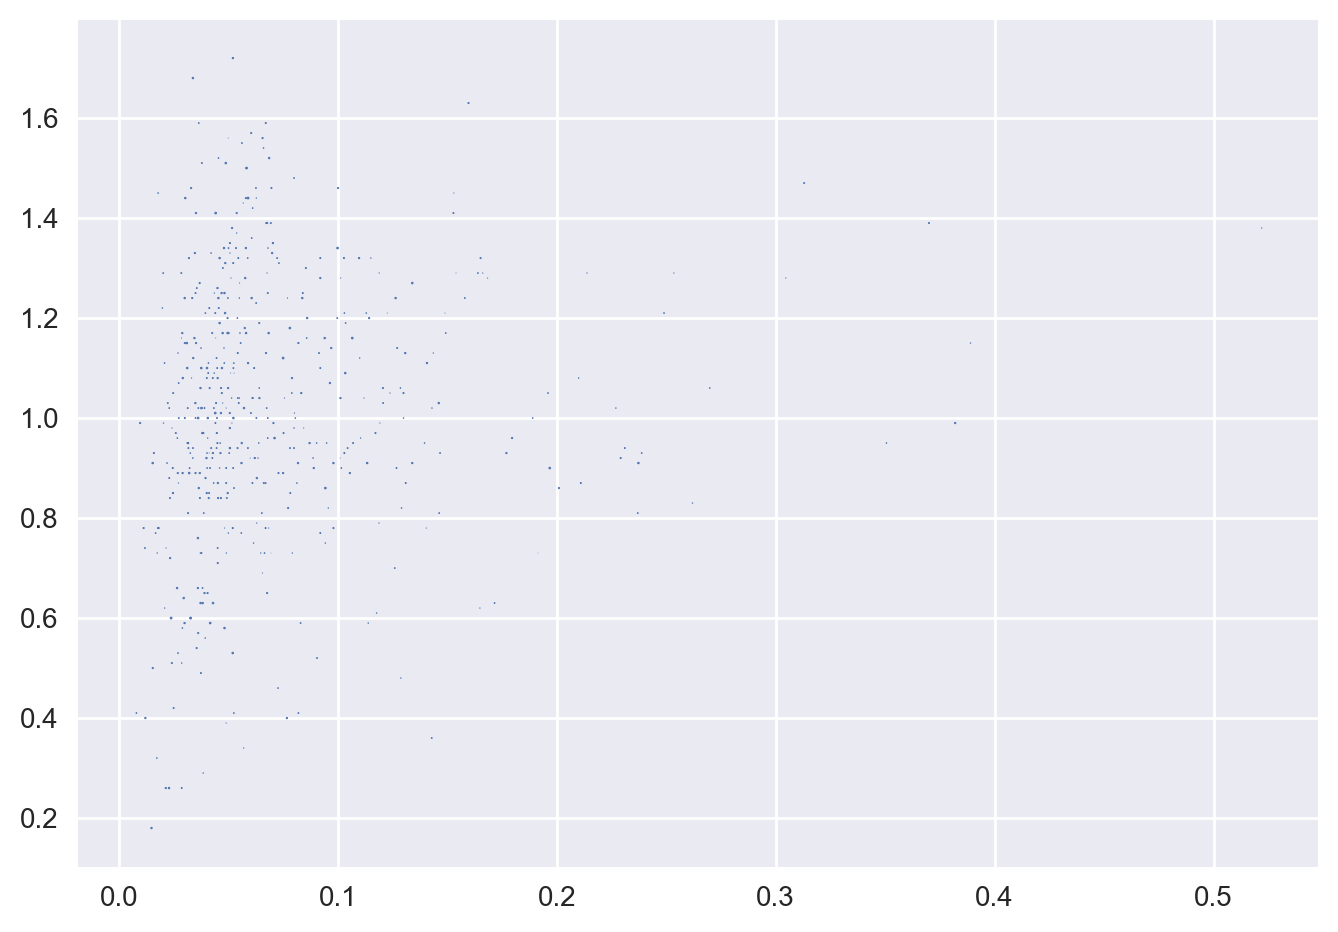

In [72]:
# massstMet = massstMet[['st_mass', 'st_masserr1', 'st_masserr2', 'st_met', 'st_meterr1', 'st_meterr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
plt.scatter( 
         x = massstMet['pl_orbsmax'], 
         y = massstMet['st_mass'],
         s = massstMet['st_met'],)
        
print( 'orbit radius vs Star Mass with Star metalicy as size')
plt.show()

### Summary and Conclusions
	We found that the strongest predictors of Planet Orbital Radius was equillibrium temperature (negative corellation) , planet radius (negative correlation) and orbital eccentricity (positive correlation). This means the cooler, smaller and more eccentric a planet is the larger the larger its orbital radius. This matches with what we would expect, however the values that we see for the r^2 are lower than we would expect (maximum being 0.104 for equillibrium temperature). 
    
    As our data set has a large margin of error we encountered the issue of finding weak corellations and incomplete data. We will consider exploring more data sets for phase 2 and revising the graphing we did in phase 1 in order to account for this margin of error, fix mistakes and find more insightful conclusions to derive from the data.

### References
	“List of all known planets and hosts” [database] (n.d). Retrieved 2nd of October 2022 from https://exoplanetarchive.ipac.caltech.edu/index.html